Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

**Problem Statement**

Perform Univariate and Bivariate analysis to explore which/what factors are playing major role in increasing Netflix viewers. What type of content and who all are adding more value to Netflix 

**Importing Required Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading Data**

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df["type"].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Appying info command, below can be inferred:

1.   Except release year being of type numerical, rest of the columns are of object type.
2.   Fewer columns have null/missing entries.

In [ ]:
df.describe(include="all")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Total Rows->8807 and Total cols->12

**PREPROCESSING DATA**

In [ ]:
#checking null/missing values for all the columns
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

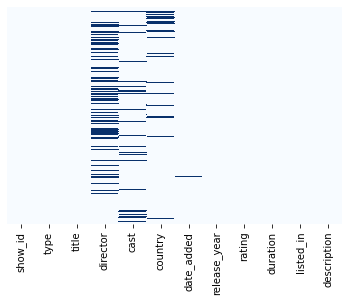

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

Observations from above:

1.   Director, cast, country, date_added,ratings, and duration have null entries
2.   date_added,ratings, and duration have limited entries for null so these can be dropped
3.   Director, cast, and country have abundant null entries so these can't be dropped as dropping these values would downsample the data and hence need to replace NaN with specific string




In [ ]:
# df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
df["director"].replace(to_replace=np.nan, value="Other director",inplace=True)
df["cast"].replace(to_replace=np.nan, value="Other cast",inplace=True)
df["country"].replace(to_replace=np.nan, value="Other country",inplace=True)

In [ ]:
# As there are very less NaN rows for date_added,rating,duration, so these rows can be dropped
df.dropna(subset=["date_added","rating","duration"],axis=0,inplace=True)



1.   date_added column has type object,this need to be converted to relevant date object
2.   Fetching month and year from the date column 



In [ ]:
df["month_added"]=pd.to_datetime(df["date_added"]).dt.month
df["year_added"]=pd.to_datetime(df["date_added"]).dt.year
df["day_added"]=pd.to_datetime(df["date_added"]).dt.day

In [ ]:
# Duration column has 2 different kind of data for TV Shows and movies so adding column Total_season and Total_duration based on "min" and "season"

df["Total_season"]=df["duration"].apply(lambda x: str(x).split(" ")[0] if ("Season" or "Seasons") in str(x) else "0").astype(int)
df["Total_duration"]=df["duration"].apply(lambda x: str(x).split(" ")[0] if "min" in str(x) else "0").astype(int)

In [ ]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
# Refrenece Taken from https://help.netflix.com/en/node/2064/us

maturity_rating={
    "PG-13":"Teens",
    "TV-MA":"Adults",
    "PG":"Kids-P",
    "TV-14":"Teens",
    "TV-PG":"Kids-P",
    "TV-Y":"Kids",
    "TV-Y7":"Kids>7",
    "R":"Adults",
    "TV-G":"Kids",
    "G":"Kids",
    "NC-17":"Adults",
    "NR":"Adults",
    "TV-Y7-FV":"Kids-P",
    "UR":"Adults"
}

# NR and UR -> Not Rated and Unrated are marked as Adults
# Kids-P -> can be watched with parental guidance

df["maturity_rating"]=df["rating"].replace(maturity_rating)

# Dropping columns which are not required for analysis
df.drop(["rating","description","date_added","duration"],inplace=True,axis=1)

In [ ]:
# copying original dataset so that it remains intact for graphical analysis
original_data=df.copy()

Mentioned columns cast, listed_in, country and director have nested list of values and these need to converted in single items

In [ ]:
#spliting cast column to get separate item in each column according to title index

cast_split=df["cast"].apply(lambda x: str(x).split(",")).tolist()
cast_new=pd.DataFrame(cast_split,index=df["title"])
cast_new

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,Other cast,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,Other cast,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,Other cast,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
#stacking cast column to convert columns to rows for each single item

cast_stack=cast_new.stack()
cast_final=pd.DataFrame(cast_stack)
cast_final

0
title                                         
Dick Johnson Is Dead 0              Other cast
Blood & Water        0              Ama Qamata
                     1             Khosi Ngema
                     2           Gail Mabalane
                     3          Thabang Molaba
...                                        ...
Zubaan               3        Manish Chaudhary
                     4            Meghna Malik
                     5           Malkeet Rauni
                     6          Anita Shabdish
                     7   Chittaranjan Tripathy

[64841 rows x 1 columns]

In [ ]:
#renaming default column 0 to cast_final
cast_final.rename({0:"casts"},axis=1,inplace=True)

In [ ]:
#spliting listed_in column to get separate item in each column according to title index

listed_in_split=df["listed_in"].apply(lambda x: str(x).split(",")).tolist()
listed_in_new=pd.DataFrame(listed_in_split,index=df["title"])
listed_in_new

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Ganglands,Crime TV Shows,International TV Shows,TV Action & Adventure
Jailbirds New Orleans,Docuseries,Reality TV,None
Kota Factory,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
Zodiac,Cult Movies,Dramas,Thrillers
Zombie Dumb,Kids' TV,Korean TV Shows,TV Comedies
Zombieland,Comedies,Horror Movies,None


In [ ]:
#stacking listed_in column to convert columns to rows for each single item

listed_in_stack=listed_in_new.stack()
genres_final=pd.DataFrame(listed_in_stack)
genres_final

0
title                                           
Dick Johnson Is Dead 0             Documentaries
Blood & Water        0    International TV Shows
                     1                 TV Dramas
                     2              TV Mysteries
Ganglands            0            Crime TV Shows
...                                          ...
Zoom                 0  Children & Family Movies
                     1                  Comedies
Zubaan               0                    Dramas
                     1      International Movies
                     2          Music & Musicals

[19294 rows x 1 columns]

In [ ]:
#renaming default column 0 to genres_final
genres_final.rename({0:"genres"},axis=1,inplace=True)

In [ ]:
#spliting director column to get separate item in each column according to title index

director_split=df["director"].apply(lambda x: str(x).split(",")).tolist()
director_new=pd.DataFrame(director_split,index=df["title"])
director_new

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,Other director,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,Other director,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,Other director,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,Other director,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
#stacking director column to convert columns to rows for each single item

director_new_stack=director_new.stack()
director_final=pd.DataFrame(director_new_stack)
director_final

,,0
title,,
Dick Johnson Is Dead,0,Kirsten Johnson
Blood & Water,0,Other director
Ganglands,0,Julien Leclercq
Jailbirds New Orleans,0,Other director
Kota Factory,0,Other director
...,...,...
Zodiac,0,David Fincher
Zombie Dumb,0,Other director
Zombieland,0,Ruben Fleischer


In [ ]:
#renaming default column 0 to director_final
director_final.rename({0:"directors"},axis=1,inplace=True)

In [ ]:
#spliting country column to get separate item in each column according to title index

country_split=df["country"].apply(lambda x: str(x).split(",")).tolist()
country_new=pd.DataFrame(country_split,index=df["title"])
country_new

,0,1,2,3,4,5,6,7,8,9,10,11
title,,,,,,,,,,,,
Dick Johnson Is Dead,United States,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Other country,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,Other country,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,United States,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,Other country,None,None,None,None,None,None,None,None,None,None,None
Zombieland,United States,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
#stacking country column to convert columns to rows for each single item

country_stack=country_new.stack()
country_final=pd.DataFrame(country_stack)
country_final

,,0
title,,
Dick Johnson Is Dead,0,United States
Blood & Water,0,South Africa
Ganglands,0,Other country
Jailbirds New Orleans,0,Other country
Kota Factory,0,India
...,...,...
Zodiac,0,United States
Zombie Dumb,0,Other country
Zombieland,0,United States


In [ ]:
#renaming default column 0 to country_final

country_final.rename({0:"countries"},axis=1,inplace=True)
country_final.reset_index()
country_final

,,countries
title,,
Dick Johnson Is Dead,0,United States
Blood & Water,0,South Africa
Ganglands,0,Other country
Jailbirds New Orleans,0,Other country
Kota Factory,0,India
...,...,...
Zodiac,0,United States
Zombie Dumb,0,Other country
Zombieland,0,United States


In [ ]:
#Merging all the stacked columns cast_final,genres_final,director_final,country_final to main dataframe df

df=df.merge(cast_final,how='inner',on="title")
df=df.merge(genres_final,how='inner',on="title")
df=df.merge(director_final,how='inner',on="title")
df=df.merge(country_final,how='inner',on="title")

In [ ]:
#checking null values for all the columns
df.isna().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
release_year       0
listed_in          0
month_added        0
year_added         0
day_added          0
Total_season       0
Total_duration     0
maturity_rating    0
casts              0
genres             0
directors          0
countries          0
dtype: int64

In [ ]:
# Now main columns director,cast,country,listed_in are converted to single items so droppping listed columns

df.drop(["director","cast","country","listed_in"],axis=1,inplace=True)

In [ ]:
df.head(2)

,show_id,type,title,release_year,month_added,year_added,day_added,Total_season,Total_duration,maturity_rating,casts,genres,directors,countries
0,s1,Movie,Dick Johnson Is Dead,2020,9,2021,25,0,90,Teens,Other cast,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,2021,9,2021,24,2,0,Adults,Ama Qamata,International TV Shows,Other director,South Africa


In [ ]:
df.shape

(201837, 14)

In [ ]:
original_data["type"].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

There are more movies released in Netflix than TV Shows

In [ ]:
original_data["maturity_rating"].value_counts()

Adults    4089
Teens     2647
Kids-P    1154
Kids       567
Kids>7     333
Name: maturity_rating, dtype: int64

There are more content for Adults and Teens in Netflix

In [ ]:
original_data["release_year"].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943])

Dataset contains Movies/TV Shows which got released from year 1943 to 2021 

In [ ]:
df.loc[df.duplicated()]

,show_id,type,title,release_year,month_added,year_added,day_added,Total_season,Total_duration,maturity_rating,casts,genres,directors,countries
39354,s1632,Movie,Rust Creek,2018,11,2020,30,0,108,Adults,Micah Hauptman,Thrillers,Jen McGowan,United States
135651,s6014,Movie,300 Miles to Heaven,1989,10,2019,1,0,93,Teens,Adrianna Biedrzyńska,Dramas,Maciej Dejczer,Denmark
135652,s6014,Movie,300 Miles to Heaven,1989,10,2019,1,0,93,Teens,Adrianna Biedrzyńska,Dramas,Maciej Dejczer,France
135653,s6014,Movie,300 Miles to Heaven,1989,10,2019,1,0,93,Teens,Adrianna Biedrzyńska,Dramas,Maciej Dejczer,Poland
135654,s6014,Movie,300 Miles to Heaven,1989,10,2019,1,0,93,Teens,Adrianna Biedrzyńska,International Movies,Maciej Dejczer,Denmark
135655,s6014,Movie,300 Miles to Heaven,1989,10,2019,1,0,93,Teens,Adrianna Biedrzyńska,International Movies,Maciej Dejczer,France
135656,s6014,Movie,300 Miles to Heaven,1989,10,2019,1,0,93,Teens,Adrianna Biedrzyńska,International Movies,Maciej Dejczer,Poland


In [ ]:
#Dropping duplicated values
df.drop_duplicates(keep="first",inplace=True)

In [ ]:
np.any(df.duplicated())

False

In [ ]:
df.head()

,show_id,type,title,release_year,month_added,year_added,day_added,Total_season,Total_duration,maturity_rating,casts,genres,directors,countries
0,s1,Movie,Dick Johnson Is Dead,2020,9,2021,25,0,90,Teens,Other cast,Documentaries,Kirsten Johnson,United States
1,s2,TV Show,Blood & Water,2021,9,2021,24,2,0,Adults,Ama Qamata,International TV Shows,Other director,South Africa
2,s2,TV Show,Blood & Water,2021,9,2021,24,2,0,Adults,Ama Qamata,TV Dramas,Other director,South Africa
3,s2,TV Show,Blood & Water,2021,9,2021,24,2,0,Adults,Ama Qamata,TV Mysteries,Other director,South Africa
4,s2,TV Show,Blood & Water,2021,9,2021,24,2,0,Adults,Khosi Ngema,International TV Shows,Other director,South Africa


In [ ]:
original_data["Total_season"].value_counts()[1:10]

1    1791
2     421
3     198
4      94
5      64
6      33
7      23
8      17
9       9
Name: Total_season, dtype: int64

There are more TV Shows which only have 1 season

In [ ]:
original_data["Total_duration"].value_counts()[1:10]

90     152
97     146
94     146
93     146
91     144
95     137
96     130
92     129
102    122
Name: Total_duration, dtype: int64

There are more movies which have duration between 90 to 100 mins

In [ ]:
df["countries"].unique()

array(['United States', 'South Africa', 'Other country', 'India',
       ' Ghana', ' Burkina Faso', ' United Kingdom', ' Germany',
       ' Ethiopia', 'United Kingdom', 'Germany', ' Czech Republic',
       'Mexico', 'Turkey', 'Australia', ' India', ' France', 'Finland',
       'China', ' Canada', ' United States', ' Japan', 'Nigeria', 'Japan',
       'Spain', 'France', 'Belgium', 'South Korea', ' Singapore',
       ' Australia', ' Mexico', ' Italy', ' Romania', 'Argentina',
       ' Venezuela', ' Hong Kong', 'Russia', 'Canada', 'Hong Kong',
       ' China', 'Italy', '', ' South Korea', 'Ireland', ' Nepal',
       'New Zealand', ' Brazil', ' Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Brazil', ' Spain', 'Taiwan', ' Nigeria',
       'Bulgaria', ' Algeria', 'Poland', ' Israel', 'Saudi Arabia',
       'Thailand', 'Indonesia', 'Egypt', ' Denmark', ' Switzerland',
       'Kuwait', ' Netherlands', ' Belgium', 'Malaysia', ' New Zealand',
       'Vietnam', ' Hungary', 'Swede

'United States' and ' United States' are treated as 2 different country values, likewise 'United Kingdom' and ' United Kingdom' are 2 different country values, whitespace need to be trimmed, same can be observed in genre,director and cast columns.





In [ ]:
#trimming whitespace in country column using strip
df["countries"]=df["countries"].apply(lambda x: str(x).strip())
df["countries"].unique()

array(['United States', 'South Africa', 'Other country', 'India', 'Ghana',
       'Burkina Faso', 'United Kingdom', 'Germany', 'Ethiopia',
       'Czech Republic', 'Mexico', 'Turkey', 'Australia', 'France',
       'Finland', 'China', 'Canada', 'Japan', 'Nigeria', 'Spain',
       'Belgium', 'South Korea', 'Singapore', 'Italy', 'Romania',
       'Argentina', 'Venezuela', 'Hong Kong', 'Russia', '', 'Ireland',
       'Nepal', 'New Zealand', 'Brazil', 'Greece', 'Jordan', 'Colombia',
       'Switzerland', 'Israel', 'Taiwan', 'Bulgaria', 'Algeria', 'Poland',
       'Saudi Arabia', 'Thailand', 'Indonesia', 'Egypt', 'Denmark',
       'Kuwait', 'Netherlands', 'Malaysia', 'Vietnam', 'Hungary',
       'Sweden', 'Lebanon', 'Syria', 'Philippines', 'Iceland',
       'United Arab Emirates', 'Norway', 'Qatar', 'Mauritius', 'Austria',
       'Cameroon', 'Palestine', 'Uruguay', 'Kenya', 'Chile', 'Luxembourg',
       'Cambodia', 'Bangladesh', 'Portugal', 'Cayman Islands', 'Senegal',
       'Serbia', 'Malt

In [ ]:
df["genres"].unique()

array(['Documentaries', 'International TV Shows', ' TV Dramas',
       ' TV Mysteries', 'Crime TV Shows', ' International TV Shows',
       ' TV Action & Adventure', 'Docuseries', ' Reality TV',
       ' Romantic TV Shows', ' TV Comedies', 'TV Dramas', ' TV Horror',
       'Children & Family Movies', 'Dramas', ' Independent Movies',
       ' International Movies', 'British TV Shows', 'Comedies', ' Dramas',
       ' Docuseries', ' Comedies', ' Crime TV Shows', 'TV Comedies',
       ' Spanish-Language TV Shows', 'Thrillers', ' Romantic Movies',
       ' Music & Musicals', 'Horror Movies', ' Sci-Fi & Fantasy',
       ' TV Thrillers', "Kids' TV", ' Thrillers', 'Action & Adventure',
       ' TV Sci-Fi & Fantasy', ' Classic Movies', ' Horror Movies',
       ' Anime Features', 'Reality TV', ' Sports Movies', 'Anime Series',
       " Kids' TV", 'International Movies', ' Korean TV Shows',
       'Sci-Fi & Fantasy', ' Science & Nature TV', ' Teen TV Shows',
       ' Cult Movies', 'Classic Movies

In [ ]:
#trimming whitespace in genre column using strip
df["genres"]=df["genres"].apply(lambda x: str(x).strip())
df["genres"].unique()

array(['Documentaries', 'International TV Shows', 'TV Dramas',
       'TV Mysteries', 'Crime TV Shows', 'TV Action & Adventure',
       'Docuseries', 'Reality TV', 'Romantic TV Shows', 'TV Comedies',
       'TV Horror', 'Children & Family Movies', 'Dramas',
       'Independent Movies', 'International Movies', 'British TV Shows',
       'Comedies', 'Spanish-Language TV Shows', 'Thrillers',
       'Romantic Movies', 'Music & Musicals', 'Horror Movies',
       'Sci-Fi & Fantasy', 'TV Thrillers', "Kids' TV",
       'Action & Adventure', 'TV Sci-Fi & Fantasy', 'Classic Movies',
       'Anime Features', 'Sports Movies', 'Anime Series',
       'Korean TV Shows', 'Science & Nature TV', 'Teen TV Shows',
       'Cult Movies', 'TV Shows', 'Faith & Spirituality', 'LGBTQ Movies',
       'Stand-Up Comedy', 'Movies', 'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV'], dtype=object)

In [ ]:
df["directors"].nunique()

5119

In [ ]:
df["directors"]=df["directors"].apply(lambda x: str(x).strip())
df["directors"].nunique()

4992

In [ ]:
df["casts"].nunique()

39249

In [ ]:
df["casts"]=df["casts"].apply(lambda x : str(x).strip())
df["casts"].nunique()

36393

**Univariate Analysis**

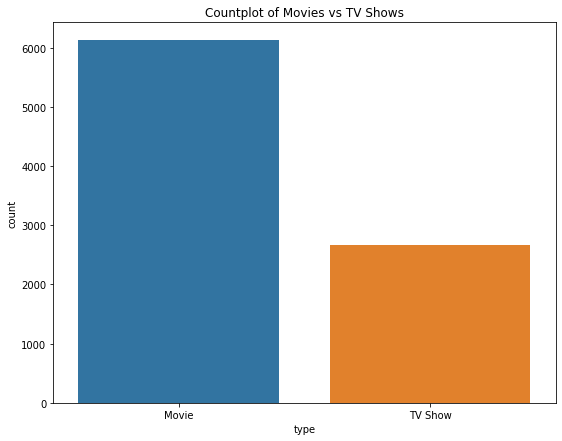

In [ ]:
plt.figure(figsize=(9,7))
sns.countplot(data=original_data,x="type")
plt.title("Countplot of Movies vs TV Shows")
plt.show()

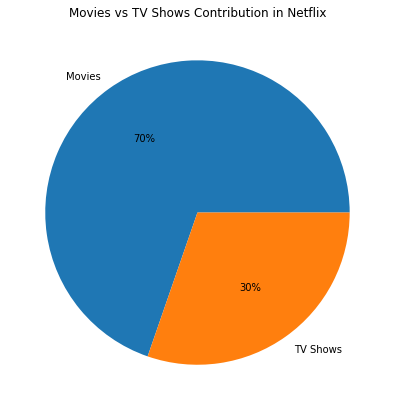

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(original_data["type"].value_counts().tolist(),labels=["Movies","TV Shows"],autopct="%.0f%%")
plt.title("Movies vs TV Shows Contribution in Netflix")
plt.show()

Netfix comprises around 70% movies and remaining 30% denote TV Shows

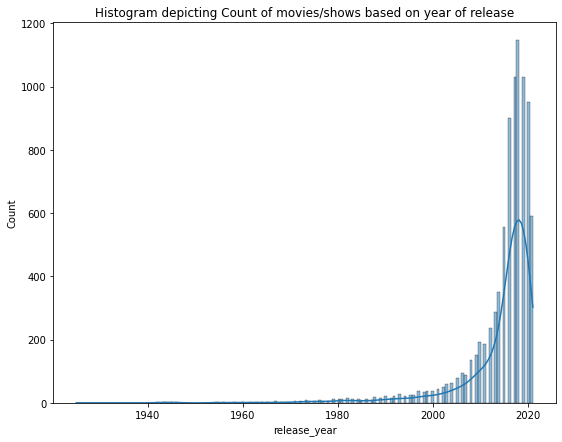

In [ ]:
plt.figure(figsize=(9,7))
sns.histplot(data=original_data,x="release_year",kde=True)
plt.title("Histogram depicting Count of movies/shows based on year of release")
plt.show()

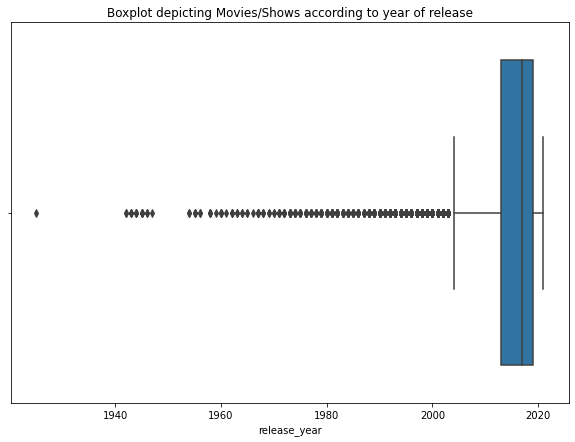

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=original_data,x="release_year")
plt.title("Boxplot depicting Movies/Shows according to year of release")
plt.show()

From above graph we can perceive that movies and TV Shows were predominantly released during 2000-2020 year

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


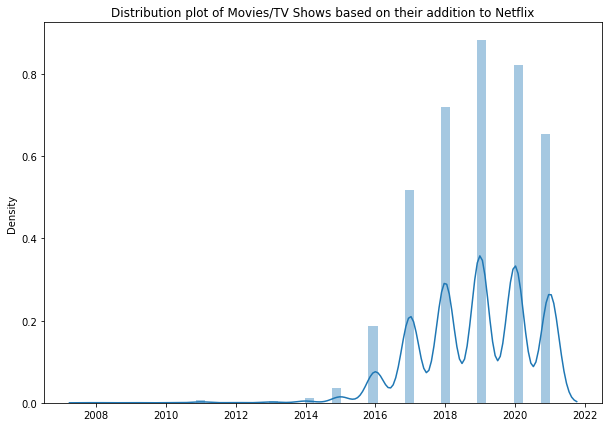

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(x=original_data["year_added"])
plt.title("Distribution plot of Movies/TV Shows based on their addition to Netflix")
plt.show()

Max movies are added in Netflix in year 2019

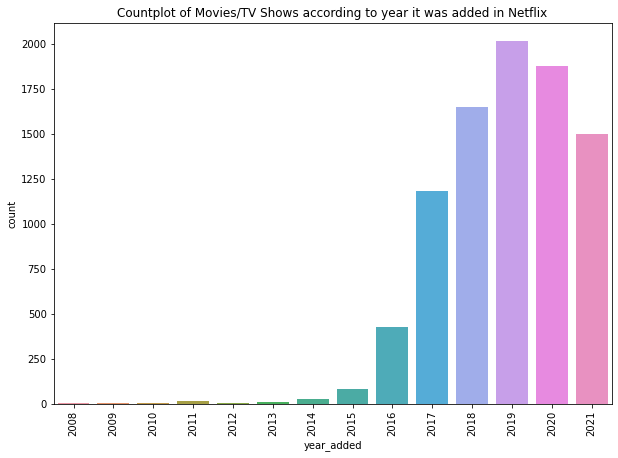

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=original_data,x="year_added")
plt.xticks(rotation=90)
plt.title("Countplot of Movies/TV Shows according to year it was added in Netflix")
plt.show()

Most of the Movies/TV Shows are added on Netflix from 2017 onwards

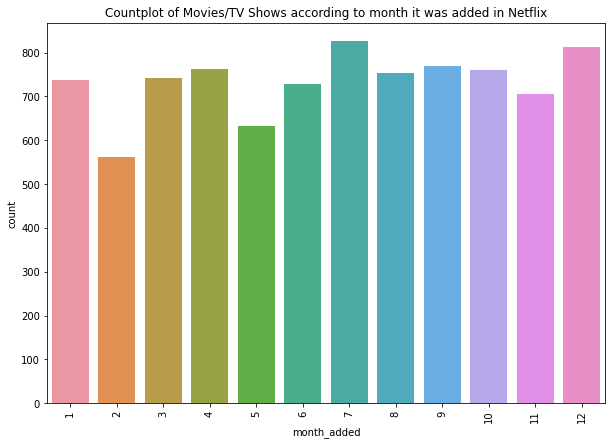

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=original_data,x="month_added")
plt.xticks(rotation=90)
plt.title("Countplot of Movies/TV Shows according to month it was added in Netflix")
plt.show()

Most of the TV Shows were added in July and December month but there does not seems to be any pattern on month feature

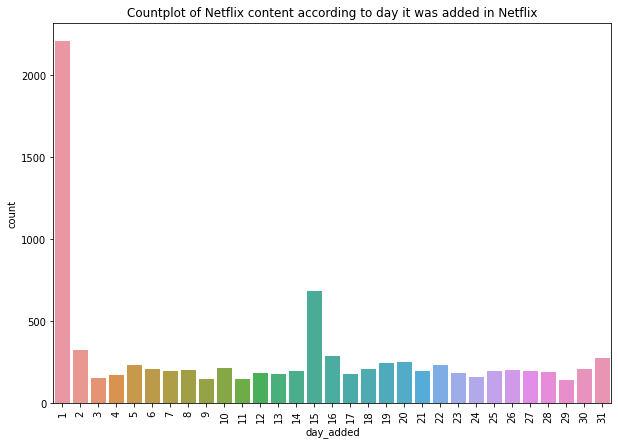

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=original_data,x="day_added")
plt.xticks(rotation=90)
plt.title("Countplot of Netflix content according to day it was added in Netflix")
plt.show()

Most of the content in Netflix are either added on 1st of every month or 15th of every month

In [ ]:
original_data["maturity_rating"].value_counts()

Adults    4089
Teens     2647
Kids-P    1154
Kids       567
Kids>7     333
Name: maturity_rating, dtype: int64

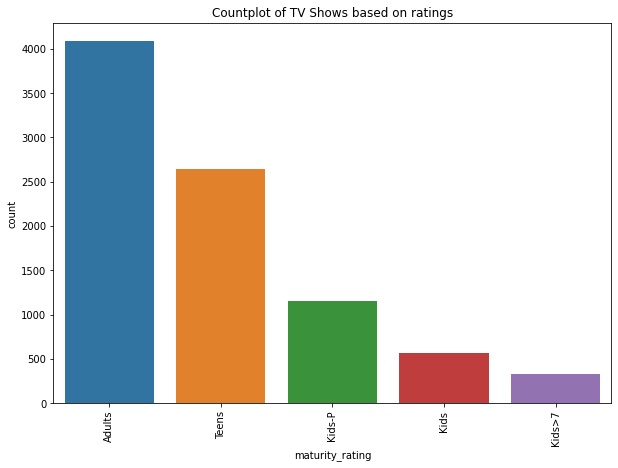

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=original_data,x="maturity_rating",order=original_data['maturity_rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Countplot of TV Shows based on ratings")
plt.show()

Maximum content are for Adults and Teens

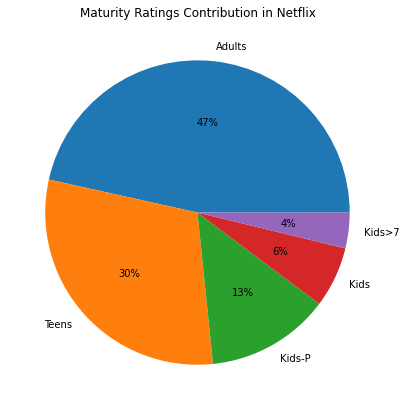

In [ ]:
plt.figure(figsize=(10,7))
plt.pie(original_data["maturity_rating"].value_counts().tolist(),labels=["Adults","Teens","Kids-P","Kids","Kids>7"],autopct="%.0f%%")
plt.title("Maturity Ratings Contribution in Netflix")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


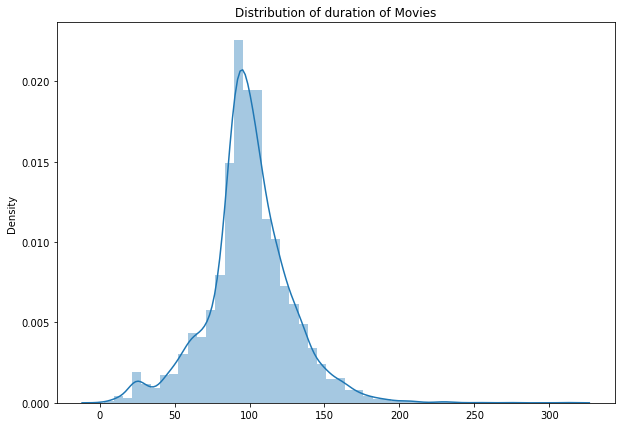

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(x=original_data[original_data.Total_duration!=0]["Total_duration"])
plt.title("Distribution of duration of Movies")
plt.show()

Maximum movies fall under the duration between 90 to 110 mins

In [ ]:
original_data["Total_season"].value_counts()[1:]

1     1791
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: Total_season, dtype: int64

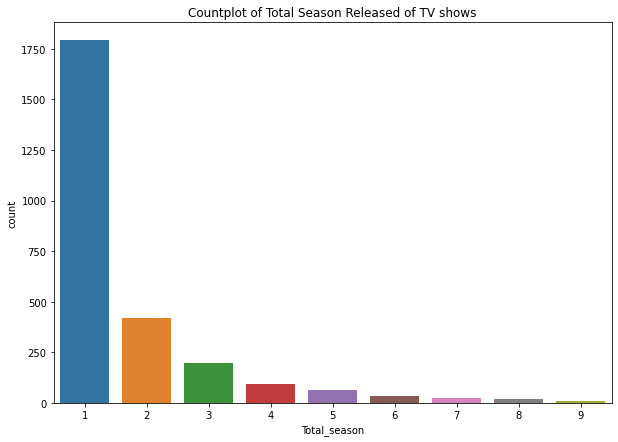

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x=original_data["Total_season"],order=original_data["Total_season"].value_counts().index[1:10])
plt.title("Countplot of Total Season Released of TV shows")
plt.show()

Netflix has more shows which only have season 1 and season 2

**Bivariate Analysis**

In [ ]:
TV_Show=df.loc[df["type"]=="TV Show"]
Movies=df.loc[df["type"]=="Movie"]

In [ ]:
Movies.groupby([])

In [ ]:
Movies.groupby(["genres","title"]).size().reset_index()

,genres,title,0
0,Action & Adventure,"10,000 B.C.",18
1,Action & Adventure,14 Blades,36
2,Action & Adventure,16 Blocks,20
3,Action & Adventure,2012,10
4,Action & Adventure,2307: Winter's Dream,11
...,...,...,...
13180,Thrillers,Your Son,10
13181,Thrillers,Zero Hour,8
13182,Thrillers,Zinzana,12
13183,Thrillers,Zodiac,10


In [ ]:
Movies.groupby(["genres"])["title"].unique().reset_index().head(3)

,genres,title
0,Action & Adventure,"[The Stronghold, Birth of the Dragon, Jaws, Ja..."
1,Anime Features,[InuYasha the Movie 2: The Castle Beyond the L...
2,Children & Family Movies,"[My Little Pony: A New Generation, Confessions..."


In [ ]:
temp=Movies.groupby(["genres","title"]).size().reset_index()

In [ ]:
temp[temp["genres"]=="Action & Adventure"]

,genres,title,0
0,Action & Adventure,"10,000 B.C.",18
1,Action & Adventure,14 Blades,36
2,Action & Adventure,16 Blocks,20
3,Action & Adventure,2012,10
4,Action & Adventure,2307: Winter's Dream,11
...,...,...,...
854,Action & Adventure,Yamla Pagla Deewana 2,10
855,Action & Adventure,You Don't Mess with the Zohan,10
856,Action & Adventure,Young Tiger,5
857,Action & Adventure,Æon Flux,11


In [ ]:
temp["genres"].value_counts()

International Movies        2752
Dramas                      2426
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Cult Movies                   71
Anime Features                71
Faith & Spirituality          65
Movies                        53
Name: genres, dtype: int64

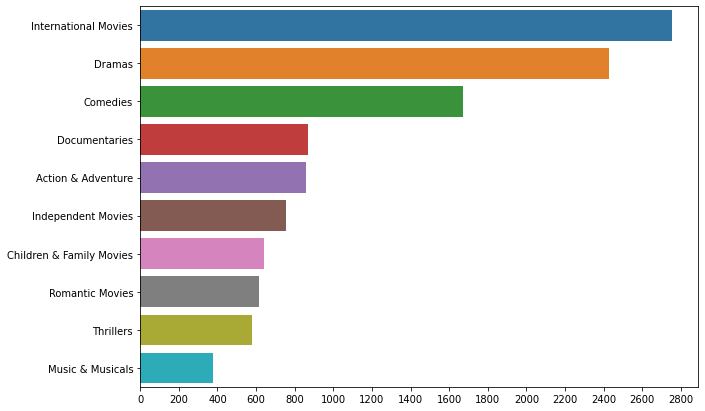

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(y=temp["genres"].value_counts().index[:10],x=temp["genres"].value_counts().values[:10],data=temp)
plt.xticks(np.arange(0,3000,step=200))
plt.show()

In [ ]:
Unique_Movie_genres=Movies.groupby(["genres"])["title"].unique().reset_index()
Unique_Movie_genres["movies_count"]=Unique_Movie_genres["title"].apply(lambda x: len(x))
Unique_Movie_genres.head()

,genres,title,movies_count
0,Action & Adventure,"[The Stronghold, Birth of the Dragon, Jaws, Ja...",859
1,Anime Features,[InuYasha the Movie 2: The Castle Beyond the L...,71
2,Children & Family Movies,"[My Little Pony: A New Generation, Confessions...",641
3,Classic Movies,"[Jaws, Blade Runner: The Final Cut, Do the Rig...",116
4,Comedies,"[The Starling, Confessions of an Invisible Gir...",1674


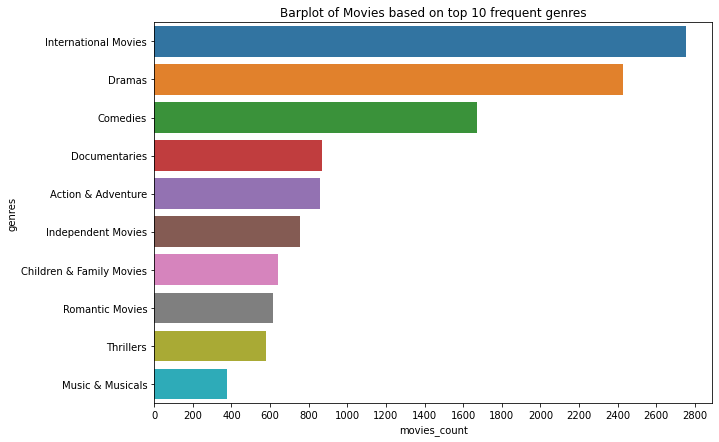

In [ ]:
Unique_Movie_genres=Movies.groupby(["genres"])["title"].unique().reset_index()
Unique_Movie_genres["movies_count"]=Unique_Movie_genres["title"].apply(lambda x: len(x))

plt.figure(figsize=(10,7))
sns.barplot(data=Unique_Movie_genres.sort_values("movies_count",ascending=False)[:10],x="movies_count",y="genres")
plt.xticks(np.arange(0,3000,step=200))
plt.title("Barplot of Movies based on top 10 frequent genres")
plt.show()

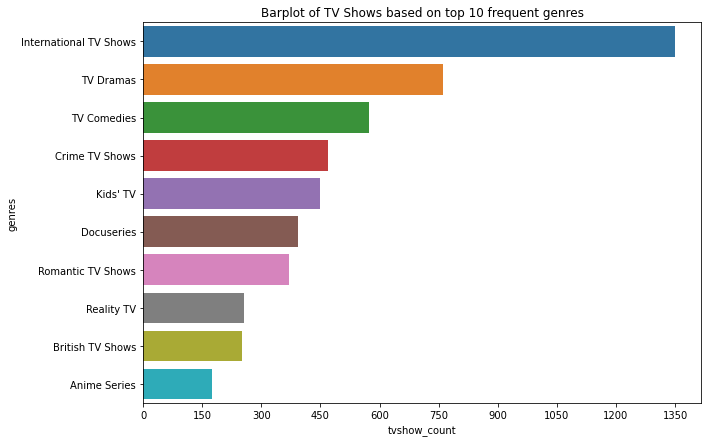

In [ ]:
Unique_TVshow_genres=TV_Show.groupby(["genres"])["title"].unique().reset_index()
Unique_TVshow_genres["tvshow_count"]=Unique_TVshow_genres["title"].apply(lambda x: len(x))

plt.figure(figsize=(10,7))
sns.barplot(data=Unique_TVshow_genres.sort_values("tvshow_count",ascending=False)[:10],x="tvshow_count",y="genres")
plt.xticks(np.arange(0,1400,step=150))
plt.title("Barplot of TV Shows based on top 10 frequent genres")
plt.show()

In [ ]:
temp2=df.groupby(["directors","title"]).size().reset_index()

temp2["directors"].value_counts()

Other director             2621
Rajiv Chilaka                22
Jan Suter                    21
Raúl Campos                  19
Marcus Raboy                 16
                           ... 
Brandon Camp                  1
Juan Antin                    1
Juan Antonio de la Riva       1
Juan Camilo Pinzon            1
Ayush Raina                   1
Name: directors, Length: 4992, dtype: int64

There are more Drama,Comedy and International Movies/TV Shows compared to other genres present in Netflix

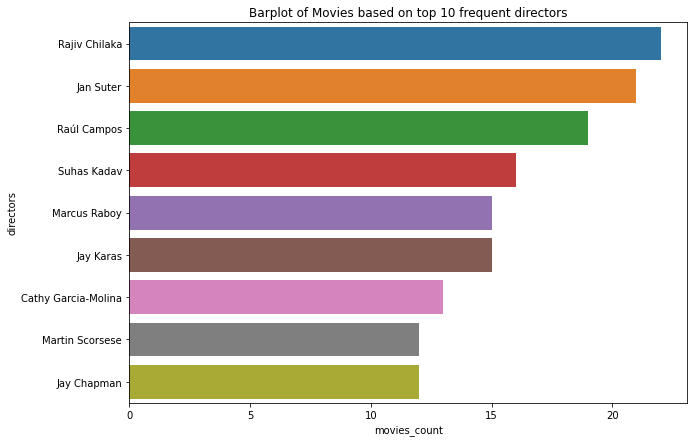

In [ ]:
Unique_Movie_Directors=Movies.groupby(["directors"])["title"].unique().reset_index()
Unique_Movie_Directors["movies_count"]=Unique_Movie_Directors["title"].apply(lambda x: len(x))

plt.figure(figsize=(10,7))
sns.barplot(data=Unique_Movie_Directors.sort_values("movies_count",ascending=False)[1:10],x="movies_count",y="directors")
plt.title("Barplot of Movies based on top 10 frequent directors")
plt.show()

Rajiv Chilaka and Jan Suter directed most of the movies released in Netflix

In [ ]:
Unique_TVShows_Directors=TV_Show.groupby(["directors"])["title"].unique().reset_index()
Unique_TVShows_Directors["tvshows_count"]=Unique_TVShows_Directors["title"].apply(lambda x: len(x))
Unique_TVShows_Directors.sort_values("tvshows_count",ascending=False)[:5]

,directors,title,tvshows_count
207,Other director,"[Blood & Water, Jailbirds New Orleans, Kota Fa...",2434
146,Ken Burns,"[Ken Burns: The Civil War, Ken Burns: The Roos...",3
8,Alastair Fothergill,"[Frozen Planet, Planet Earth: The Complete Col...",3
140,Jung-ah Im,"[Men on a Mission, Abnormal Summit]",2
252,Shin Won-ho,"[Reply 1994, Reply 1997]",2


TV Shows directors have more than 90% null values so this column cant be analysed

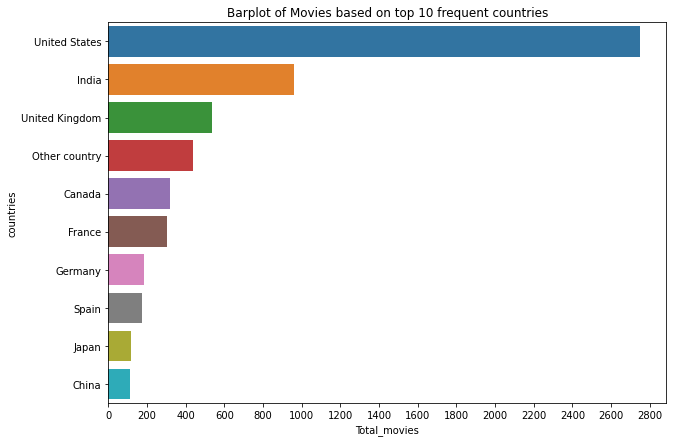

In [ ]:
unique_countries=Movies.groupby(["countries"])["title"].unique().reset_index()
unique_countries["Total_movies"]=unique_countries["title"].apply(lambda x: len(x))

plt.figure(figsize=(10,7))
sns.barplot(data=unique_countries.sort_values("Total_movies",ascending=False)[:10],x="Total_movies",y="countries")
plt.xticks(np.arange(0,3000,step=200))
plt.title("Barplot of Movies based on top 10 frequent countries")
plt.show()

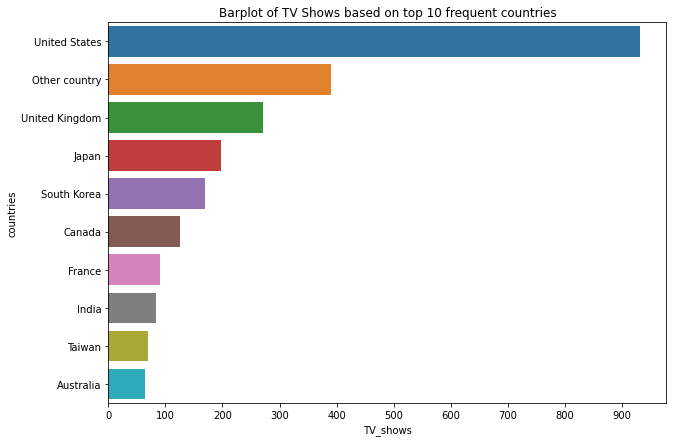

In [ ]:
unique_countries=TV_Show.groupby(["countries"])["title"].unique().reset_index()
unique_countries["TV_shows"]=unique_countries["title"].apply(lambda x: len(x))

plt.figure(figsize=(10,7))
sns.barplot(data=unique_countries.sort_values("TV_shows",ascending=False)[:10],x="TV_shows",y="countries")
plt.xticks(np.arange(0,1000,step=100))
plt.title("Barplot of TV Shows based on top 10 frequent countries")
plt.show()

There are more TV Shows/Movies released in United States and India compared to other Countries

In [ ]:
content_countries=df.groupby(["countries"])["title"].unique().reset_index()
content_countries["TV_shows"]=unique_countries["title"].apply(lambda x: len(x))
content_countries.sort_values("TV_shows",ascending=False)[:10]

,countries,title,TV_shows
64,Malawi,[The Boy Who Harnessed the Wind],932.0
43,Hong Kong,"[Initial D, Love in a Puff, Marshall, Ratchet ...",390.0
63,Luxembourg,"[Capitani, Black '47, The Take, Funan, The Com...",271.0
30,Denmark,"[Lift Like a Girl, LEGO Friends: The Power of ...",197.0
53,Jamaica,[Sprinter],170.0
8,Austria,"[The Strange House, What We Wanted, Freud, Min...",126.0
19,Cambodia,"[War Dogs, Funan, Jailbreak, First They Killed...",90.0
25,Colombia,"[Lokillo: Nothing's the Same, Las muñecas de l...",84.0
58,Kuwait,"[Back to Q82, Juman, Bye Bye London, The End, ...",70.0
2,Albania,[Forgive Us Our Debts],64.0


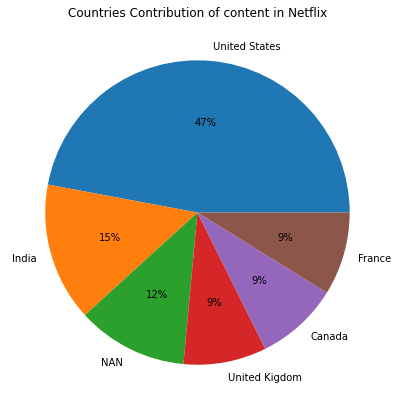

In [ ]:
content_countries=df.groupby(["countries"])["title"].unique().reset_index()
content_countries["content"]=unique_countries["title"].apply(lambda x: len(x))
content_countries.sort_values("content",ascending=False)[:10]

plt.figure(figsize=(10,7))
plt.pie(content_countries["content"].value_counts().tolist()[:6],labels=["United States","India","NAN","United Kigdom","Canada","France"],autopct="%.0f%%")
plt.title("Countries Contribution of content in Netflix")
plt.show()

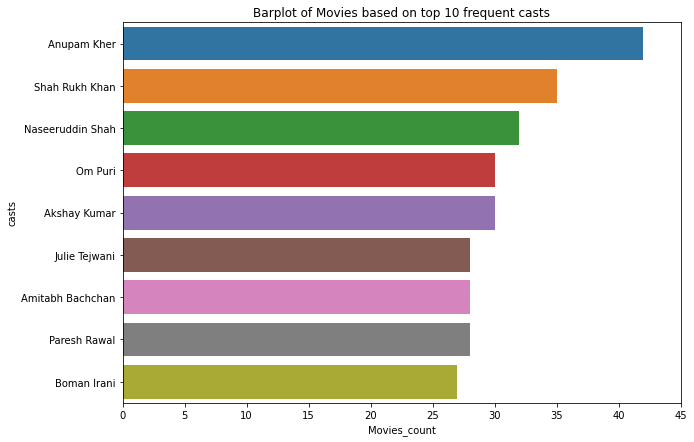

In [ ]:
Unique_Movie_cast=Movies.groupby(["casts"])["title"].unique().reset_index()
Unique_Movie_cast["Movies_count"]=Unique_Movie_cast["title"].apply(lambda x: len(x))

plt.figure(figsize=(10,7))
sns.barplot(data=Unique_Movie_cast.sort_values("Movies_count",ascending=False)[1:10],x="Movies_count",y="casts")
plt.xticks(np.arange(0,50,step=5))
plt.title("Barplot of Movies based on top 10 frequent casts")
plt.show()

Anupam Kher and Shahrukh khan worked in maximum movies present on netflix

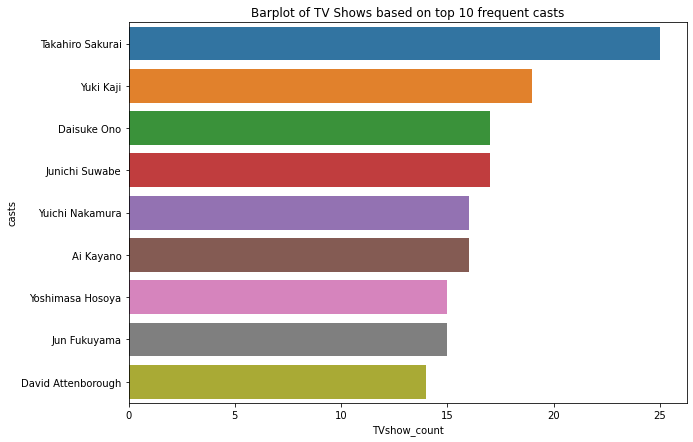

In [ ]:
Unique_TVshow_cast=TV_Show.groupby(["casts"])["title"].unique().reset_index()
Unique_TVshow_cast["TVshow_count"]=Unique_TVshow_cast["title"].apply(lambda x: len(x))

plt.figure(figsize=(10,7))
sns.barplot(data=Unique_TVshow_cast.sort_values("TVshow_count",ascending=False)[1:10],x="TVshow_count",y="casts")
plt.xticks(np.arange(0,30,step=5))
plt.title("Barplot of TV Shows based on top 10 frequent casts")
plt.show()

Takahiro Sakurai and Yuki Kaji worked in maximum TV Shows present on netflix

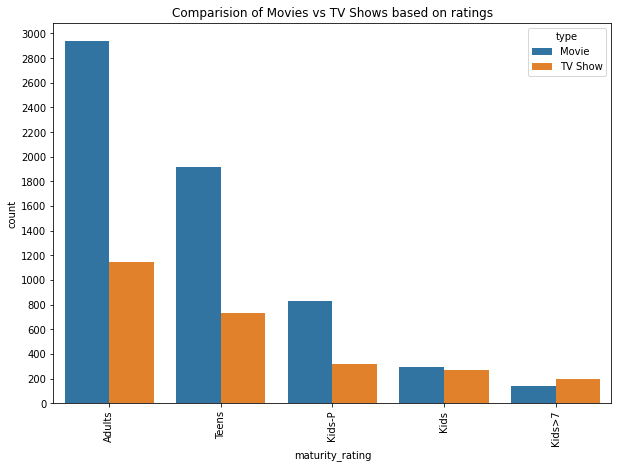

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=original_data,x="maturity_rating",order=original_data['maturity_rating'].value_counts().index,hue="type")
plt.xticks(rotation=90)
plt.title("Comparision of Movies vs TV Shows based on ratings")
plt.yticks(np.arange(0,3001,step=200))
plt.show()

In [ ]:
original_data.head()

,show_id,type,title,director,cast,country,release_year,listed_in,month_added,year_added,day_added,Total_season,Total_duration,maturity_rating
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Other cast,United States,2020,Documentaries,9,2021,25,0,90,Teens
1,s2,TV Show,Blood & Water,Other director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,"International TV Shows, TV Dramas, TV Mysteries",9,2021,24,2,0,Adults
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Other country,2021,"Crime TV Shows, International TV Shows, TV Act...",9,2021,24,1,0,Adults
3,s4,TV Show,Jailbirds New Orleans,Other director,Other cast,Other country,2021,"Docuseries, Reality TV",9,2021,24,1,0,Adults
4,s5,TV Show,Kota Factory,Other director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,"International TV Shows, Romantic TV Shows, TV ...",9,2021,24,2,0,Adults


In [ ]:
RatingVSContent=pd.crosstab(original_data["maturity_rating"],original_data["type"])
RatingVSContent

type,Movie,TV Show
maturity_rating,,
Adults,2940,1149
Kids,298,269
Kids-P,832,322
Kids>7,139,194
Teens,1917,730


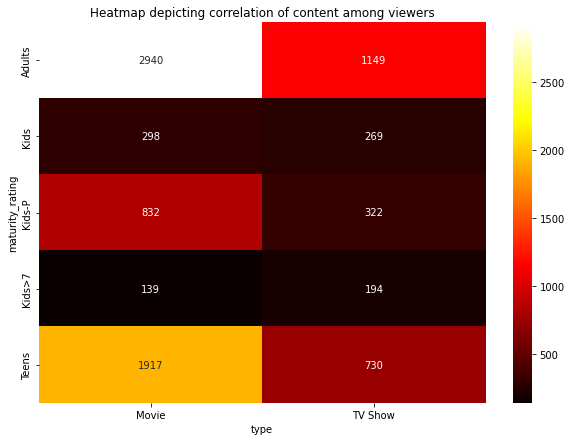

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(RatingVSContent,annot=True,cmap="hot", fmt='g')
plt.title("Heatmap depicting correlation of content among viewers")
plt.show()

Adults and Teens prefer to watch movies over TV Shows whereas kids prefer to watch both in almost equal proportions

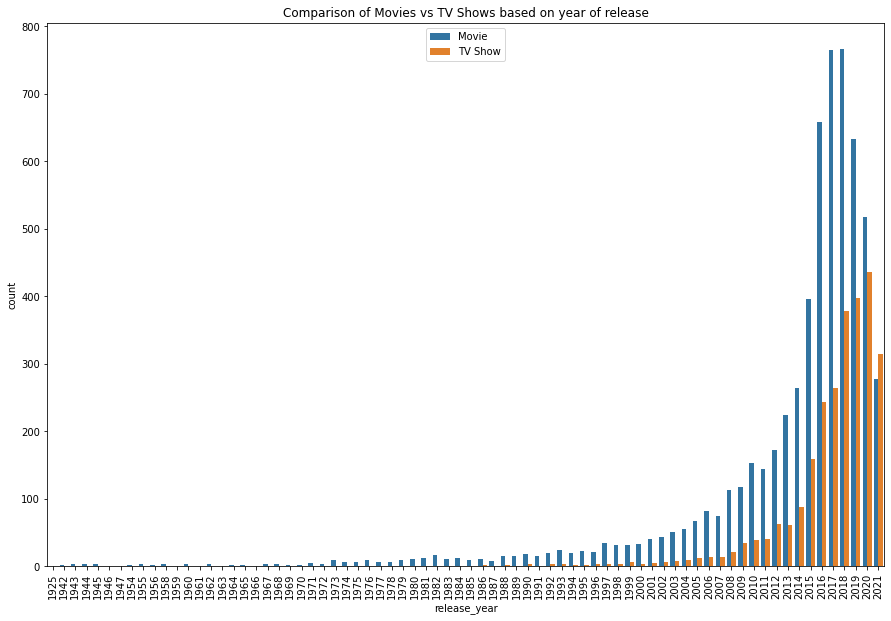

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=original_data,x="release_year",hue="type")
plt.xticks(rotation=90)
plt.title("Comparison of Movies vs TV Shows based on year of release")
plt.legend(loc="upper center")
plt.show()

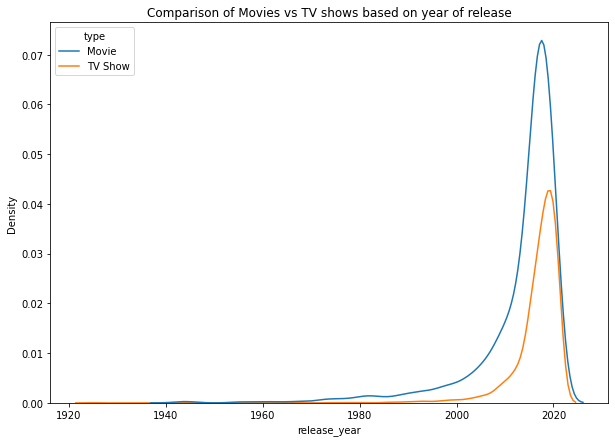

In [ ]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=original_data,x="release_year",hue="type")
plt.title("Comparison of Movies vs TV shows based on year of release")
plt.show()

There are more movies in Netflix which got released from year 2000 onwards compared to TV shows



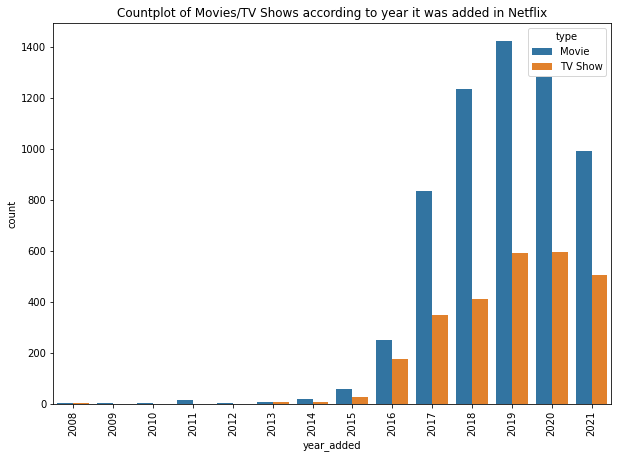

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=original_data,x="year_added",hue="type")
plt.xticks(rotation=90)
plt.title("Countplot of Movies/TV Shows according to year it was added in Netflix")
plt.show()

More number of movies were added in netflix compared to TV Shows

In [ ]:
original_data.corr()

,release_year,month_added,year_added,day_added,Total_season,Total_duration
release_year,1.000000,-0.039031,0.111624,0.140190,0.104115,-0.248928
month_added,-0.039031,1.000000,-0.160650,0.020705,0.013238,-0.017371
year_added,0.111624,-0.160650,1.000000,0.045679,0.031913,0.027903
day_added,0.140190,0.020705,0.045679,1.000000,0.041752,-0.073613
Total_season,0.104115,0.013238,0.031913,0.041752,1.000000,-0.609842
Total_duration,-0.248928,-0.017371,0.027903,-0.073613,-0.609842,1.000000


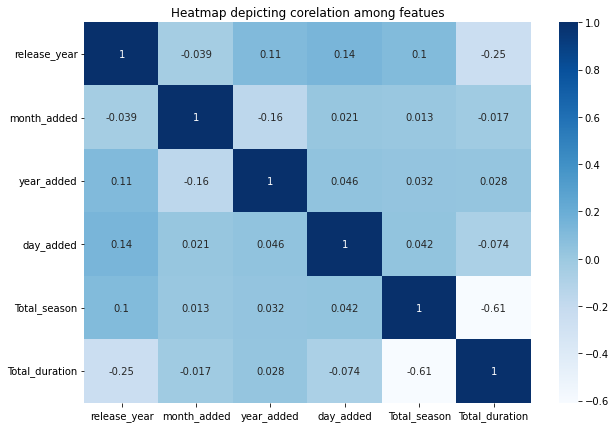

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(original_data.corr(),annot=True,cmap="Blues")
plt.title("Heatmap depicting corelation among featues")
plt.show()

There seems to be very weak corelation among numerical features

<Figure size 720x504 with 0 Axes>

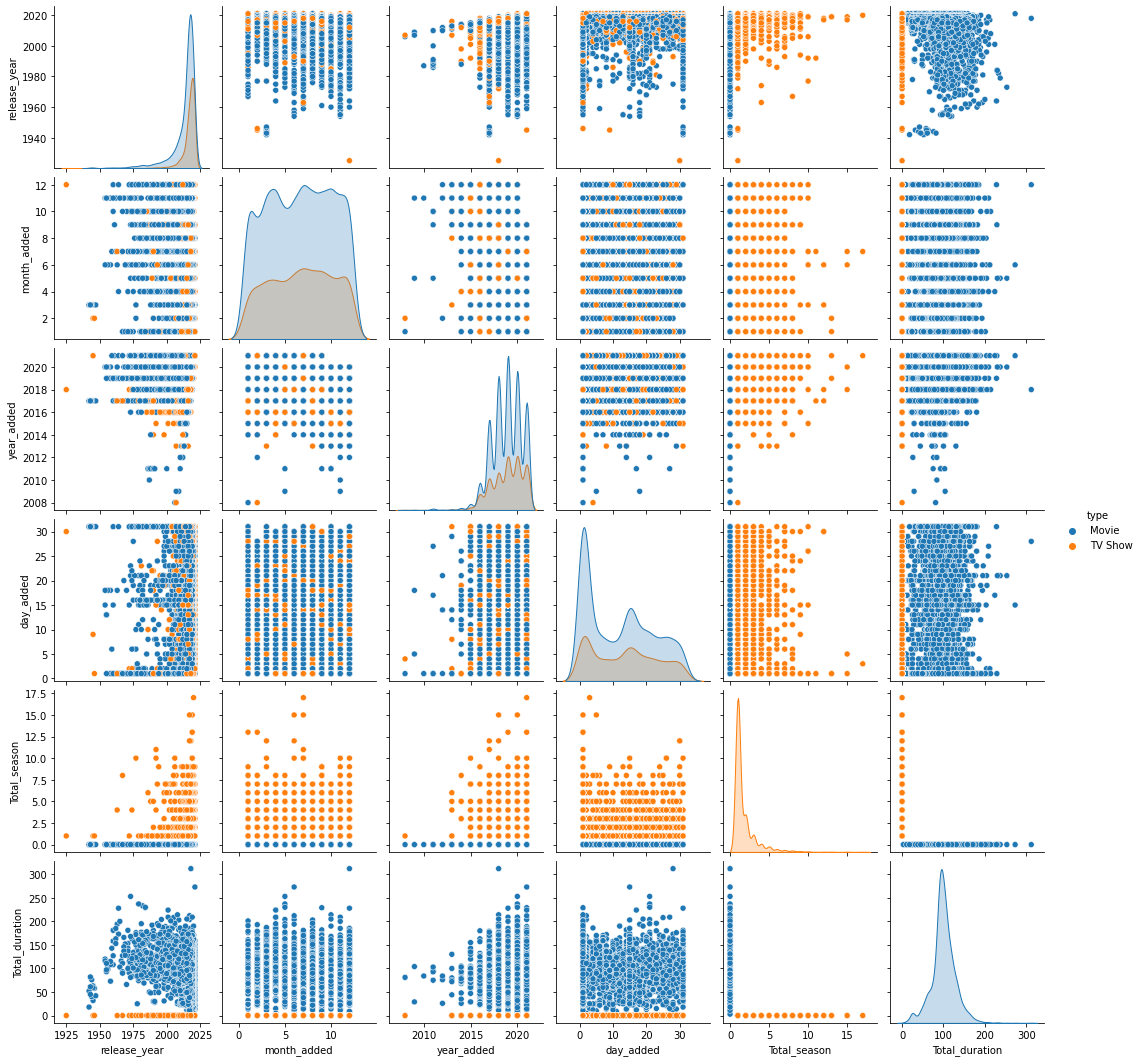

In [ ]:
plt.figure(figsize=(10,7))
sns.pairplot(original_data,hue="type")
plt.show()

As Release year is increasing, duration is somewhat getting decreased, same can be depicted from heatmap which is showing negative correlation between release year and duration

As Release year is increasing, total season is somewhat getting increased


**Checking Outliers**

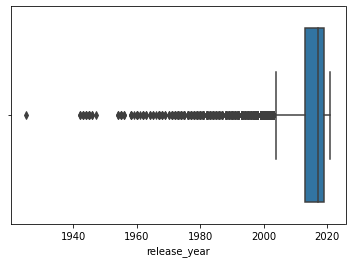

In [ ]:
sns.boxplot(data=original_data,x="release_year")

Release year have numerous outliers from 1940 year to 2000

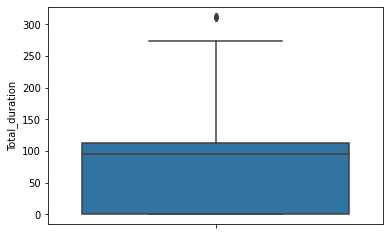

In [ ]:
sns.boxplot(data=df,y="Total_duration")

In [ ]:
original_data.loc[original_data["Total_duration"]>270,"title"].unique()

array(['Headspace: Unwind Your Mind', 'Black Mirror: Bandersnatch'],
      dtype=object)

There are only 2 movies which have duration greater than 270 min so these will be outliers and median is somewhere close to 100 min

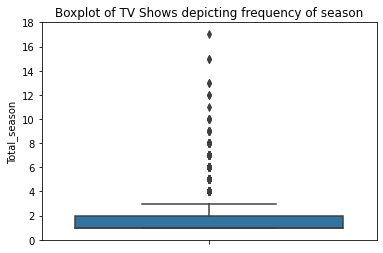

In [ ]:
sns.boxplot(data=original_data.loc[original_data["Total_season"]!=0],y="Total_season")
plt.yticks(np.arange(0,20,step=2))
plt.title("Boxplot of TV Shows depicting frequency of season")
plt.show()

In [ ]:
original_data.loc[(original_data["Total_season"]>3) & (original_data["Total_season"]!=0)]["title"].nunique()

254

There are 254 out of 2664 TV Shows which have more than 3 season so these will be outliers and median is somewhere close to 1 season

**Business Insights**





1.   There are 70% movies and 30% TV Shows present in Netflix->Viewers prefer watching movies over TV Shows.
2.   There are 47% movies/TV Shows for Adults and 30% content for Teens-> Netflix has more content which are suitable for Adults. Also Netflix offers content for wide range of audience inclusive of children, youngsters and adults
3.   There are more International Movies,Dramas,and Comedy genres present in Netflix.->Drama is most preferred genre. Viewers also prefer comedy and International Movies/TV Shows over other genres.
4.   Maximum movies fall under the duration between 90 to 110 mins-> People prefer to watch more movies whose median time is somewhere 100 min
5.   There are only 2 movies which have duration greater than 270 min ->Most of the people are not watching movies which are very lengthy.
6.   There are somewhere around 1791 TV Shows which only have 1 season and that's the maximum in shows.-> People watch 1st season of maximum shows released but tends to stop watching it when further season of that show got released.
7.   Maximum movies/tv shows present are released from 2000-2020.-> Plenty of movies/tv shows were watched which were released during 2000-2020.
8.   Most of the movies are added in Netflix from 2017 onwards-> People started appreciating the content of netflix from 2017
9.   There are only 1 or 2 TV shows which have more than 10 seasons. ->Most of the people are not watching shows which are very lengthy (more than 10 season)
10.   There are more shows/movies which are released in United States,India and United Kingdom->Audience of these countries spend most of the time watching netflix content compared to other countries.
11.   Anupam Kher and Shahrukh khan are most popular actor who have worked in max movies present in netflix.

**Recommendations**



1.   There are 70% movies present in netflix whereas 30% are TV Shows. So recommending to add more movies to gain more viewers
2.   Most of the TV shows only have season 1 and season 2: Audience enjoy watching TV Shows which have fewer seasons so its preferable to add more TV shows which dont have multiple seasons.
3.   There are more movies which have duration between 90 to 110 mins: Viewers tend to watch movies which are not bit lengthy so its preferable to add more movies which have avg running time of 100 min.
4.   Anupam Kher and Shahrukh khan worked in max movies present in netflix. These actors are more welcomed among all actors so recommending to include more of their content.
5.   Rajiv Chilaka and Jan Suter directed most of the movies released in Netflix.Content of these directors are more accepted so recommending to add more of their content.
6.   There are 70% shows/movies which are released in United States(58%) and India(12%) ->Audience of these countries spend most of the time watching netflix content compared to other contries so netflix can consider to add relatable content.
7.   Almost 77% of content present in Netflix are for Adult and Teens that means people prefer to watch Adult/Teen content in Netflix so more of these content can be added to gain more viewers.
8.   Maximum movies are added on 1st or 15th day of every month. So considering a new movies/ TV show to be released, these dates can be considered.

